This script contains the following:
1. Import data and libraries
2. Data wrangling
3. Data cleaning
4. Plotting a choropleth

1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Original Data/us-states.json'
country_geo

'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Original Data/us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Original Data/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
# Import data

df = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/STD Cases.pkl')

In [6]:
df.head()

,Disease,State,Year,Gender,Age,STD Cases,Population,Rate per 100K
0,Chlamydia,Alabama,1996,Male,0-14 years,25,468394.0,5.34
1,Chlamydia,Alabama,1996,Male,15-19 years,164,165920.0,98.84
2,Chlamydia,Alabama,1996,Male,20-24 years,193,152848.0,126.27
3,Chlamydia,Alabama,1996,Male,25-29 years,88,152778.0,57.60
4,Chlamydia,Alabama,1996,Male,30-34 years,55,155850.0,35.29


In [7]:
# Import data- gon only

df_gon = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/gonorrhea.pkl')
df_gon

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,13138,4331102.0,821.125000,0.000000,0.000000,303.340813
1,Alabama,1997,12031,4367935.0,601.550000,0.008504,-0.084259,275.439080
2,Alabama,1998,12737,4404701.0,636.850000,0.008417,0.058682,289.168323
3,Alabama,1999,10888,4430141.0,518.476190,0.005776,-0.145168,245.770959
4,Alabama,2000,12063,4451975.0,524.478261,0.004929,0.107917,270.958395
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,40,302000.0,4.000000,-0.304562,-0.459459,13.245033
965,Wyoming,2011,46,435306.0,4.181818,0.441411,0.150000,10.567279
966,Wyoming,2012,44,462639.0,3.666667,0.062790,-0.043478,9.510655
967,Wyoming,2013,66,332191.0,6.000000,-0.281965,0.500000,19.868088


In [8]:
# Import data- syp only

df_syp = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/syphilis.pkl')
df_syp

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,528,4331102.0,35.200000,0.000000,0.000000,12.190893
1,Alabama,1997,410,4367935.0,29.285714,0.008504,-0.223485,9.386587
2,Alabama,1998,274,3932336.0,21.076923,-0.099727,-0.331707,6.967868
3,Alabama,1999,202,4430141.0,14.428571,0.126593,-0.262774,4.559674
4,Alabama,2000,123,3531717.0,10.250000,-0.202798,-0.391089,3.482725
...,...,...,...,...,...,...,...,...
922,Wyoming,2008,3,154562.0,1.000000,-0.446805,-0.250000,1.940969
923,Wyoming,2009,3,58827.0,1.000000,-0.619395,0.000000,5.099699
924,Wyoming,2012,4,59690.0,1.333333,0.014670,0.333333,6.701290
925,Wyoming,2013,1,22834.0,1.000000,-0.617457,-0.750000,4.379434


In [9]:
# Import data- chl only

df_chl = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/chlamydia.pkl')
df_chl

,State,Year,STD Cases,Population,STD Cases Mean,Population Percent Change,STD Cases Percent Change,Rate per 100K
0,Alabama,1996,8283,4331102.0,517.687500,0.000000,0.000000,191.244630
1,Alabama,1997,8704,4367935.0,435.200000,0.008504,0.050827,199.270365
2,Alabama,1998,10065,4404701.0,503.250000,0.008417,0.156365,228.505862
3,Alabama,1999,12375,4430141.0,538.043478,0.005776,0.229508,279.336482
4,Alabama,2000,15323,4451975.0,638.458333,0.004929,0.238222,344.184323
...,...,...,...,...,...,...,...,...
964,Wyoming,2010,2113,563626.0,150.928571,0.035563,0.076414,374.893990
965,Wyoming,2011,2092,568158.0,139.466667,0.008041,-0.009938,368.207435
966,Wyoming,2012,2102,576412.0,150.142857,0.014528,0.004780,364.669715
967,Wyoming,2013,2005,523588.0,133.666667,-0.091643,-0.046147,382.934674


In [10]:
# Import data- totals with percent changes
totals = pd.read_pickle(r'/Users/joshd/Documents/Personal/CareerFoundry/Data Analytics Immersion/6/STI/02 Data/Prepared Data/totals.pkl')
totals

,State,Year,STD Cases,Population,Population Percent Change,STD Cases Percent Change,Rate per 100K,STD Cases Mean,STI Rates
0,Alabama,1996,21949.0,4331102.0,0.000000,0.000000,506.776335,29956.526316,No Change
1,Alabama,1997,21145.0,4367935.0,0.008504,-0.036630,484.096032,29956.526316,Decreasing
2,Alabama,1998,23076.0,4404701.0,0.008417,0.091322,523.894811,29956.526316,Increasing
3,Alabama,1999,23465.0,4430141.0,0.005776,0.016857,529.667114,29956.526316,Increasing
4,Alabama,2000,27509.0,4451975.0,0.004929,0.172342,617.905536,29956.526316,Increasing
...,...,...,...,...,...,...,...,...,...
964,Wyoming,2010,0.0,563626.0,0.035563,-1.000000,0.000000,825.684211,Decreasing
965,Wyoming,2011,0.0,568158.0,0.008041,0.000000,0.000000,825.684211,No Change
966,Wyoming,2012,2150.0,576412.0,0.014528,0.000000,372.997092,825.684211,No Change
967,Wyoming,2013,2072.0,523588.0,-0.091643,-0.036279,395.730995,825.684211,Decreasing


# 2. Data Wrangling

In [11]:
# Select only the necessary columns and put them in a list called columns

columns = ["State","STD Cases"]

In [12]:
# Create a subset

state_std = df[columns]

In [13]:
state_std.head()

,State,STD Cases
0,Alabama,25
1,Alabama,164
2,Alabama,193
3,Alabama,88
4,Alabama,55


# 3. Conduct Consistency Check

In [14]:
# Check for missing values

state_std.isnull().sum()

State        0
STD Cases    0
dtype: int64

In [15]:
# check for duplicates
dups = state_std.duplicated()

In [16]:
dups.shape # no dups

(42530,)

<AxesSubplot:xlabel='STD Cases', ylabel='Count'>

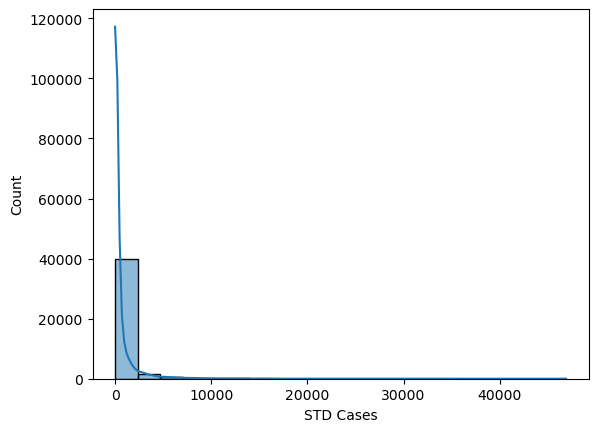

In [17]:
#Extreme Values Check
sns.histplot(state_std['STD Cases'], bins=20, kde = True) # shows extreme values for 'STD cases'

# 4 Plotting a choropleth

#analysis does show that there are more STDs in CA, TX, Florida, and North Carolina
There are more questions about which states have shown an increase in STDS? What are the average STDs in each State? Do the diferrent diseases appear more in different states? Are men and woman more effected in each state?

In [18]:
#Create cases by year by state susms using group by
cases_by_state_df = df.groupby(["State"], as_index = False).agg(
std_cases = ("STD Cases", "sum"))

In [19]:
grouped_df = cases_by_state_df.reset_index()
cases_by_state_df.head()

,State,std_cases
0,Alabama,569174
1,Alaska,89281
2,Arizona,477074
3,Arkansas,270043
4,California,2922206


In [20]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = cases_by_state_df,
    columns = ['State', 'std_cases'],
    key_on = 'feature.properties.name', 
    fill_color = 'Reds', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Total cases").add_to(map)
folium.LayerControl().add_to(map)

map

In [21]:
# Setup a folium map at a high-level zoom for Average STD Cases by State
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = totals,
    columns = ['State', 'STD Cases Mean'],
    key_on = 'feature.properties.name', 
    fill_color = 'PuBuGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = " Average STD Cases").add_to(map)
folium.LayerControl().add_to(map)

map

In [22]:
#Create cases per 100k average year by state using group by
avg_rate_by_state_df = totals.groupby(["State"], as_index = False).agg(
std_rates = ("Rate per 100K", "mean"))

In [23]:
grouped_df = avg_rate_by_state_df.reset_index()
avg_rate_by_state_df.head()

,State,std_rates
0,Alabama,648.876070
1,Alaska,539.739880
2,Arizona,420.701561
3,Arkansas,503.861681
4,California,425.494780


In [24]:
#Cases per 100K average
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = avg_rate_by_state_df,
    columns = ['State', 'std_rates'],
    key_on = 'feature.properties.name', 
    fill_color = 'Purples', fill_opacity=0.6, line_opacity=0.1,
    legend_name = " Average Rates per 100k").add_to(map)
folium.LayerControl().add_to(map)

map

In [25]:
#Average Gonorrhea cases
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = df_gon,
    columns = ['State', 'STD Cases Mean'],
    key_on = 'feature.properties.name', 
    fill_color = 'RdPu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Gonorrhea Rates").add_to(map)
folium.LayerControl().add_to(map)

map

In [26]:
#Average Syphilis cases
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = df_syp,
    columns = ['State', 'STD Cases Mean'],
    key_on = 'feature.properties.name', 
    fill_color = 'GnBu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Syphilis Rates").add_to(map)
folium.LayerControl().add_to(map)

map

In [27]:
#Average Chlamydia cases
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)


folium.Choropleth(
    geo_data = country_geo, 
    data = df_chl,
    columns = ['State', 'STD Cases Mean'],
    key_on = 'feature.properties.name', 
    fill_color = 'PuBu', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Average Chlamydia Rates").add_to(map)
folium.LayerControl().add_to(map)

map

#analysis does show that there are more average overall STDs in CA and TX which seesm to be the case for each disease singled out.  In addition when you look at average STD rates per 100K, Missisippi and North Carolina take th leadn. Does raise the question if  men and woman more effected in each state and if any age group stands out with more instances of the disease?